In [1]:
import pandas as pd
import numpy as np
from sargas import *
import matplotlib.pyplot as plt

# NVT Simulation

In [42]:
nparticles = 800

density = 8e-1
volume = nparticles / density
temperature = 9e-1
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density)
system = System(configuration, potential)
# system = System.insert_particles(nparticles, volume, temperature, 15, rc, potential, nparticles, 1000000)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
mc = MonteCarlo([displace_particle], [1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [43]:
%%time
simulation.run(nparticles * 2000)

CPU times: user 14.2 s, sys: 9.15 ms, total: 14.2 s
Wall time: 14.1 s


In [44]:
system.energy

-4365.1822729847045

In [45]:
simulation.deactivate_propagator_updates()
props = Observer.properties(1000)
simulation.add_observer(props)
widom = Observer.widom_insertion(100)
simulation.add_observer(widom)

In [46]:
%%time
simulation.run(nparticles * 2000)

CPU times: user 15.5 s, sys: 9.49 ms, total: 15.5 s
Wall time: 15.5 s


In [13]:
properties = pd.DataFrame(props.data)

In [14]:
print("u = {:.5e} +- {:.5e}".format(properties.energy.mean() / system.nparticles, properties.energy.sem() / system.nparticles))

u = -5.98883e+00 +- 1.06150e-03


In [15]:
print("p = {:.5e} +- {:.5e}".format(properties.pressure.mean(), properties.pressure.sem()))

p = 1.79720e+00 +- 5.44438e-03


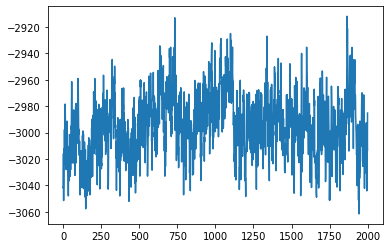

In [16]:
plt.plot(properties.energy)

# NPT

In [38]:
nparticles = 500

density = 9e-1
volume = nparticles / density
temperature = 9e-1
pressure = 5
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density)
system = System(configuration, potential)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
change_volume = MCMove.change_volume(1.0, 0.4, temperature, pressure)
mc = MonteCarlo([displace_particle, change_volume], [nparticles, 1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [39]:
%%time
simulation.run(1_000_000)

CPU times: user 6.96 s, sys: 19.5 ms, total: 6.98 s
Wall time: 6.96 s


In [40]:
#simulation.deactivate_propagator_updates()
props = Observer.properties(1000)
simulation.add_observer(props)
widom = Observer.widom_insertion(100)
simulation.add_observer(widom)

In [41]:
simulation.run(1_000_000)

In [32]:
properties = pd.DataFrame(props.data)

In [33]:
print("u = {:.5e} +- {:.5e}".format(properties.energy.mean() / system.nparticles, properties.energy.sem() / system.nparticles))

u = -1.60264e+00 +- 1.96203e-03


In [34]:
print("p = {:.5e} +- {:.5e}".format(properties.pressure.mean(), properties.pressure.sem()))

p = -5.34985e-02 +- 4.15512e-04


In [35]:
print("v = {:.5e} +- {:.5e}".format(properties.volume.mean(), properties.volume.sem()))

v = 5.72316e+03 +- 1.41653e+01


In [36]:
properties.describe()

,density,energy,volume,pressure,nparticles,virial
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,0.087917,-801.318099,5723.155710,-0.053499,500.0,-828.418352
std,0.007086,31.022483,447.947143,0.013140,0.0,198.775479
min,0.077706,-887.646722,4827.430795,-0.098575,500.0,-1419.927721
25%,0.081657,-821.636671,5342.142573,-0.062277,500.0,-964.522938
50%,0.086656,-802.076881,5769.921350,-0.053182,500.0,-831.286815
75%,0.093595,-781.577148,6123.170150,-0.044318,500.0,-695.301314
max,0.103575,-687.184250,6434.471916,-0.013131,500.0,-159.456139


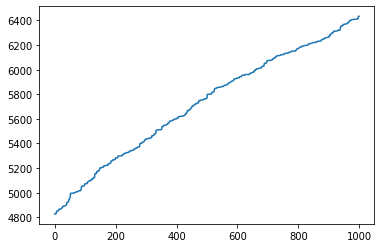

In [37]:
plt.plot(properties.volume)

# $\mu$VT Simulation

In [18]:
density = 0.5
nparticles = 500
volume = nparticles / density
temperature = 1.0

potential = Potential.lennard_jones(1.0, 1.0, tail_correction=True)
system = System.insert_particles(nparticles, volume, temperature, chemical_potential-2, 3.0, potential, nparticles + 100, 1000000)

displace_particle = MCMove.displace_particle(0.1, 0.4, nparticles)
insert_delete_particle = MCMove.insert_delete_particle(chemical_potential)
mc = MonteCarlo([displace_particle, insert_delete_particle], [3, 1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [19]:
%%time
print("Equilibration")
simulation.run(nparticles * 1000)

simulation.deactivate_propagator_updates()
props = Observer.properties(100)
simulation.add_observer(props)

print("Production")
simulation.run(nparticles * 5000)

Equilibration
Production
CPU times: user 348 ms, sys: 3.96 ms, total: 352 ms
Wall time: 351 ms


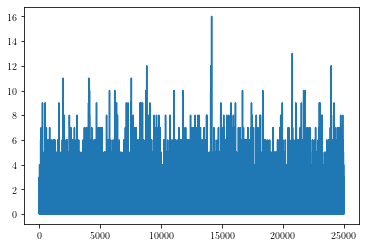

In [20]:
properties = pd.DataFrame(props.data)
plt.plot(properties.nparticles)

In [33]:
properties.nparticles

0        2.0
1        1.0
2        3.0
3        4.0
4        1.0
        ... 
24995    1.0
24996    2.0
24997    0.0
24998    2.0
24999    1.0
Name: nparticles, Length: 25000, dtype: float64